In [136]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:

csv_paths = Path("data").glob("*.csv")

buf = []
for csv_path in csv_paths:
    df_csv = pd.read_csv(csv_path)
    print(csv_path, len(df_csv))
    buf.append(df_csv)


data/010000.csv 1000
data/002000.csv 1000
data/000000.csv 1000
data/012000.csv 56
data/008000.csv 1000
data/004000.csv 1000
data/006000.csv 1000
data/011000.csv 1000
data/003000.csv 1000
data/001000.csv 1000
data/009000.csv 1000
data/005000.csv 1000
data/007000.csv 1000


In [177]:
usecols = [
'id',
# 'guidislink',
# 'link',
# 'updated',
# 'updated_parsed',
'published',
# 'published_parsed',
'title',
# 'title_detail',
'summary',
# 'summary_detail',
'authors',
# 'author_detail',
'author',
# 'links',
'arxiv_primary_category',
'tags',
# 'arxiv_comment',
# 'arxiv_doi',
# 'arxiv_affiliation',
# 'arxiv_journal_ref'
]

df = pd.concat(buf).reset_index(drop=True)
assert df.duplicated(subset="id").sum() == 0,  df.duplicated(subset="id").sum()

df = df[usecols]

df["published"] = pd.to_datetime(df["published"])
df = df.sort_values("published")

df["primary_category"] = df["arxiv_primary_category"].apply(lambda x: eval(x)["term"])

df["primary_category_head"] = df["primary_category"].apply(lambda x: x.split(".")[0])

df = df.set_index("published")

df = df["2015":"2020"]


df["title"] = df["title"].replace("\n|\r", "", regex=True)
df["summary"] = df["summary"].replace("\n|\r", "", regex=True)


target_category = ['cs', 'stat','eess','q-fin','econ']
m = df["primary_category_head"].isin(target_category)
df = df[m]

In [169]:
df["summary"].iloc[6].replace("\n", " ")

'Given a pattern x of length m and a text y of length n, both over an ordered alphabet, the order-preserving pattern matching problem consists in finding all substrings of the text with the same relative order as the pattern. It is an approximate variant of the well known exact pattern matching problem which has gained attention in recent years. This interesting problem finds applications in a lot of fields as time series analysis, like share prices on stock markets, weather data analysis or to musical melody matching. In this paper we present two new filtering approaches which turn out to be much more effective in practice than the previously presented methods. From our experimental results it turns out that our proposed solutions are up to 2 times faster than the previous solutions reducing the number of false positives up to 99%'

In [170]:
df["summary"].apply(lambda x: x.replace("\n", " ").replace("\r", ""))

published
2015-01-02 14:09:46+00:00    While analyzing vehicular sensor data, we foun...
2015-01-02 21:15:00+00:00    A particular case of Recurrent Neural Network ...
2015-01-06 17:57:36+00:00    Cointegration analysis is used to estimate the...
2015-01-06 19:21:24+00:00    The abundance of online user data has led to a...
2015-01-07 03:34:52+00:00    Social network based trust relationships prese...
                                                   ...                        
2020-12-30 06:33:51+00:00    With large quantities of data typically availa...
2020-12-31 02:48:35+00:00    In the past two decades, the field of applied ...
2020-12-31 04:01:13+00:00    We estimate the relationship between GDP per c...
2020-12-31 16:22:30+00:00    The paper proposes a computational adaptation ...
2020-12-31 21:10:09+00:00    Thumbnail is the face of online videos. The ex...
Name: summary, Length: 4093, dtype: object

In [176]:
dfp = df.copy()
dfp["summary"].iloc[0] = "abcd\nefg\r"
df["summary"].replace("\n|\r", "", regex=True)

published
2015-01-02 14:09:46+00:00                                              abcdefg
2015-01-02 21:15:00+00:00    A particular case of Recurrent Neural Network ...
2015-01-06 17:57:36+00:00    Cointegration analysis is used to estimate the...
2015-01-06 19:21:24+00:00    The abundance of online user data has led to a...
2015-01-07 03:34:52+00:00    Social network based trust relationships prese...
                                                   ...                        
2020-12-30 06:33:51+00:00    With large quantities of data typically availa...
2020-12-31 02:48:35+00:00    In the past two decades, the field of applied ...
2020-12-31 04:01:13+00:00    We estimate the relationship between GDP per c...
2020-12-31 16:22:30+00:00    The paper proposes a computational adaptation ...
2020-12-31 21:10:09+00:00    Thumbnail is the face of online videos. The ex...
Name: summary, Length: 4093, dtype: object

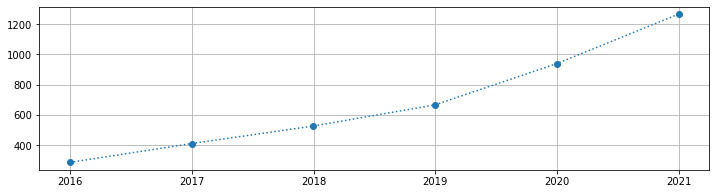

In [134]:
df_count = df["primary_category_head"].groupby(pd.Grouper(freq='Y')).count()

x = df_count.index
y = df_count.values

plt.figure(figsize=(12, 3))
plt.plot(x, y, ":o")
plt.grid()

In [155]:
df_cat_count = df.groupby(
    [pd.Grouper(freq='Q'), "primary_category_head"])["id"].count().reset_index()
df_cat_count

,published,primary_category_head,id
0,2015-03-31 00:00:00+00:00,cs,29
1,2015-03-31 00:00:00+00:00,q-fin,5
2,2015-03-31 00:00:00+00:00,stat,21
3,2015-06-30 00:00:00+00:00,cs,34
4,2015-06-30 00:00:00+00:00,q-fin,11
...,...,...,...
96,2020-12-31 00:00:00+00:00,cs,176
97,2020-12-31 00:00:00+00:00,econ,15
98,2020-12-31 00:00:00+00:00,eess,36
99,2020-12-31 00:00:00+00:00,q-fin,18


<AxesSubplot:xlabel='published', ylabel='id'>

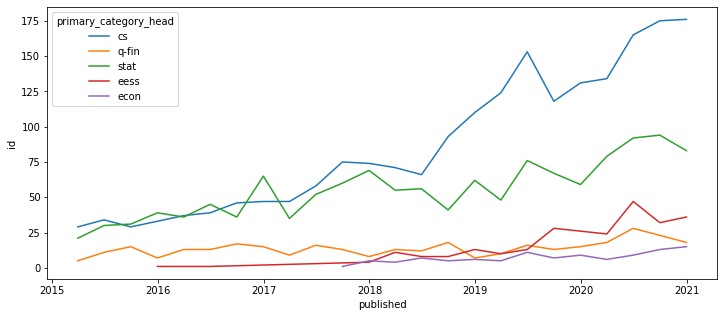

In [156]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df_cat_count, x="published", y="id", hue="primary_category_head", markers=True, dashes=True)